# Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

C:\Users\asuss\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
C:\Users\asuss\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('./rentcrawler210921', index_col=0)
data

,標題,網址,詳情,地址,租金
0,溫馨方正套房-豪宅式生活機能--蘆洲站,//rent.591.com.tw/rent-detail-7507197.html,獨立套房\n\n \n\n ...,蘆洲區-長樂路,"15,500"
1,可貓.華翠大橋/萬板大橋.大空間2房1廳,//rent.591.com.tw/rent-detail-11329598.html,整層住家\n\n \n ...,板橋區-民治街,"25,888"
2,煮台對外大窗陽台遠東園區環球獨立洗衣機,//rent.591.com.tw/rent-detail-11349243.html,獨立套房\n\n \n\n ...,中和區-新生街16巷,"10,500"
3,新台五路麥當勞獨立套房出租,//rent.591.com.tw/rent-detail-6792524.html,獨立套房\n\n \n\n ...,汐止區-新台五路一段172號,"8,000"
4,迴龍捷運站萬安街便宜雅房，可現住/見說明,//rent.591.com.tw/rent-detail-11320426.html,雅房\n\n \n\n ...,新莊區-萬安街,"3,400"
...,...,...,...,...,...
595,永和豫溪街(近頂溪捷運站)套房出租,//rent.591.com.tw/rent-detail-11458857.html,獨立套房\n\n \n\n ...,永和區-豫溪街141號,"6,500"
596,板橋中正商圈兩房公寓,//rent.591.com.tw/rent-detail-11453557.html,整層住家\n\n \n ...,板橋區-金華街21巷,"22,000"
597,格套房/簡約風/舒適套房/家電全,//rent.591.com.tw/rent-detail-11366604.html,獨立套房\n\n \n\n ...,蘆洲區-成功路,"11,000"
598,超大「1房1廳」!近新埔、埔墘商圈,//rent.591.com.tw/rent-detail-11413870.html,獨立套房\n\n \n\n ...,板橋區-三民路二段,"15,900"


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   標題      600 non-null    object
 1   網址      600 non-null    object
 2   詳情      600 non-null    object
 3   地址      600 non-null    object
 4   租金      600 non-null    object
dtypes: object(5)
memory usage: 28.1+ KB


In [4]:
print('data shape:', data.shape)

data shape: (600, 5)


# Feature engineering

In [5]:
#租金轉化為整數型態
#data = pd.read_csv('./rent210921', index_col=0, thousands=',')
data['租金'] = data['租金'].str.replace(',','').astype('int')
data['租金']

0      15500
1      25888
2      10500
3       8000
4       3400
       ...  
595     6500
596    22000
597    11000
598    15900
599     5500
Name: 租金, Length: 600, dtype: int32

In [6]:
data['詳情'] = data['詳情'].str.replace('\xa0', '').replace('\n', '').replace(' ','')
data['詳情']

0      獨立套房\n\n                                \n\n  ...
1      整層住家\n\n                                \n    ...
2      獨立套房\n\n                                \n\n  ...
3      獨立套房\n\n                                \n\n  ...
4      雅房\n\n                                \n\n    ...
                             ...                        
595    獨立套房\n\n                                \n\n  ...
596    整層住家\n\n                                \n    ...
597    獨立套房\n\n                                \n\n  ...
598    獨立套房\n\n                                \n\n  ...
599    獨立套房\n\n                                \n\n  ...
Name: 詳情, Length: 600, dtype: object

In [7]:
data['房型'] = data['詳情'].str.split('|').str.get(0)
data['房型'] = data['房型'].str.strip()
data['房型'].value_counts()

獨立套房    243
整層住家    210
分租套房     95
雅房       32
車位       17
其他        3
Name: 房型, dtype: int64

In [8]:
#只分析房型:獨立套房/整層住家/分租套房/雅房
data = data.drop(data[data['房型'] == '車位'].index)
data = data.drop(data[data['房型'] == '其他'].index)
data['房型'].value_counts()

獨立套房    243
整層住家    210
分租套房     95
雅房       32
Name: 房型, dtype: int64

In [9]:
data_family = data[data['房型'] == '整層住家']
data_not_family = data[data['房型'] != '整層住家']

In [10]:
data_family['格局'] = data_family['詳情'].str.split('|').str.get(1)
data_family['格局'] = data_family['格局'].str.strip()
data_family['格局'] = data_family['格局'].str[:1]
data_family = data_family[data_family['格局'] != '開'] #去除開放式空間的格局
data_family['格局'] = data_family['格局'].astype('int')
data_family['格局']

1      2
5      3
9      4
17     3
23     3
      ..
577    3
580    2
588    2
594    3
596    2
Name: 格局, Length: 205, dtype: int32

In [11]:
data_family['坪數'] = data_family['詳情'].str.split('|').str.get(2)
data_family['坪數'] = data_family['坪數'].str.strip()
data_family['坪數'] = data_family['坪數'].apply(lambda x : ''.join([i for i in x if i.isdigit() or i=='.']))
data_family['坪數'] = data_family['坪數'].astype('float')
data_family['坪數']

1      25.0
5      50.0
9      46.3
17     39.0
23     29.0
       ... 
577    41.2
580    17.0
588    20.0
594    26.0
596    21.6
Name: 坪數, Length: 205, dtype: float64

In [12]:
data_family['樓層'] = data_family['詳情'].str.split('|').str.get(3)
data_family['樓層'] = data_family['樓層'].str.split('：').str.get(1)
data_family['樓層'] = data_family['樓層'].str.split('/').str.get(0)
data_family['樓層']

1       5
5       2
9       1
17     12
23      3
       ..
577     3
580     4
588     5
594     3
596     3
Name: 樓層, Length: 205, dtype: object

In [13]:
data_not_family['格局'] = '1'
data_not_family['格局'] = data_not_family['格局'].astype('int')
data_not_family['格局']

0      1
2      1
3      1
4      1
6      1
      ..
593    1
595    1
597    1
598    1
599    1
Name: 格局, Length: 370, dtype: int32

In [14]:
data_not_family['坪數'] = data_not_family['詳情'].str.split('|').str.get(1)
data_not_family['坪數'] = data_not_family['坪數'].str.strip()
data_not_family['坪數'] = data_not_family['坪數'].apply(lambda x : ''.join([i for i in x if i.isdigit() or i=='.']))
data_not_family['坪數'] = data_not_family['坪數'].astype('float')
data_not_family['坪數']

0       7.0
2       8.0
3       6.0
4       5.0
6       9.5
       ... 
593     5.0
595     6.0
597    10.0
598    17.0
599     5.0
Name: 坪數, Length: 370, dtype: float64

In [15]:
data_not_family['樓層'] = data_not_family['詳情'].str.split('|').str.get(2)
data_not_family['樓層'] = data_not_family['樓層'].str.split('：').str.get(1)
data_not_family['樓層'] = data_not_family['樓層'].str.split('/').str.get(0)
data_not_family['樓層']

0         3
2         5
3         1
4         5
6      頂樓加蓋
       ... 
593       3
595       4
597       4
598       2
599       2
Name: 樓層, Length: 370, dtype: object

In [16]:
data = data_not_family.append(data_family).reset_index(drop=True)
data

,標題,網址,詳情,地址,租金,房型,格局,坪數,樓層
0,溫馨方正套房-豪宅式生活機能--蘆洲站,//rent.591.com.tw/rent-detail-7507197.html,獨立套房\n\n \n\n ...,蘆洲區-長樂路,15500,獨立套房,1,7.0,3
1,煮台對外大窗陽台遠東園區環球獨立洗衣機,//rent.591.com.tw/rent-detail-11349243.html,獨立套房\n\n \n\n ...,中和區-新生街16巷,10500,獨立套房,1,8.0,5
2,新台五路麥當勞獨立套房出租,//rent.591.com.tw/rent-detail-6792524.html,獨立套房\n\n \n\n ...,汐止區-新台五路一段172號,8000,獨立套房,1,6.0,1
3,迴龍捷運站萬安街便宜雅房，可現住/見說明,//rent.591.com.tw/rent-detail-11320426.html,雅房\n\n \n\n ...,新莊區-萬安街,3400,雅房,1,5.0,5
4,設計師品味裝潢捷運套房,//rent.591.com.tw/rent-detail-11393689.html,獨立套房\n\n \n\n ...,板橋區-懷德街181巷,16000,獨立套房,1,9.5,頂樓加蓋
...,...,...,...,...,...,...,...,...,...
570,誠徵長期優質租客.全新未住過.優質社區,//rent.591.com.tw/rent-detail-11418848.html,整層住家\n\n \n ...,鶯歌區-龍七路,24800,整層住家,3,41.2,3
571,精緻溫馨風簡約二房近成蘆橋,//rent.591.com.tw/rent-detail-11414979.html,整層住家\n\n \n ...,五股區-成泰路三段589巷,16500,整層住家,2,17.0,4
572,新新新二房佰萬裝潢高級傢俱,//rent.591.com.tw/rent-detail-11337716.html,整層住家\n\n \n ...,板橋區-五權街,19800,整層住家,2,20.0,5
573,鬧中取靜舒適宅,//rent.591.com.tw/rent-detail-11310101.html,整層住家\n\n \n ...,土城區-延峰街33巷5號,19000,整層住家,3,26.0,3


In [17]:
data['地區'] = data['地址'].str.split('-').str.get(0)
data['地區']

0      蘆洲區
1      中和區
2      汐止區
3      新莊區
4      板橋區
      ... 
570    鶯歌區
571    五股區
572    板橋區
573    土城區
574    板橋區
Name: 地區, Length: 575, dtype: object

In [18]:
data['地區'].value_counts() #分類太多 將相近的區域結合

板橋區    140
三重區     88
中和區     77
新莊區     53
永和區     53
蘆洲區     38
淡水區     30
新店區     25
汐止區     20
土城區     20
林口區     10
五股區      5
樹林區      5
三峽區      4
八里區      3
鶯歌區      2
泰山區      1
深坑區      1
Name: 地區, dtype: int64

In [19]:
data_tamsui = data[data['地區']=='淡水區'].append(data[data['地區']=='八里區'])
data_sls = data[data['地區']=='三重區'].append(data[data['地區']=='蘆洲區']).append(data[data['地區']=='新莊區'])
data_wt = data[data['地區']=='五股區'].append(data[data['地區']=='泰山區'])
data_bhh = data[data['地區']=='板橋區'].append(data[data['地區']=='中和區']).append(data[data['地區']=='永和區'])
data_xs = data[data['地區']=='新店區'].append(data[data['地區']=='深坑區'])
data_xizhi = data[data['地區']=='汐止區']
data_linkou = data[data['地區']=='林口區']
data_syts = data[data['地區']=='樹林區'].append(data[data['地區']=='鶯歌區']).append(data[data['地區']=='土城區']).append(data[data['地區']=='三峽區'])

data_tamsui['分區'] = '淡海'
data_sls['分區'] = '三蘆新莊'
data_wt['分區'] = '五股泰山'
data_bhh['分區'] = '板中永和'
data_xs['分區'] = '新店深坑'
data_xizhi['分區'] = '汐止'
data_linkou['分區'] = '林口'
data_syts['分區'] = '樹鶯土峽'

data = data_tamsui.append(data_sls).append(data_wt).append(data_bhh).append(data_xs).append(data_xizhi).append(data_linkou).append(data_syts).reset_index(drop=True)
data

,標題,網址,詳情,地址,租金,房型,格局,坪數,樓層,地區,分區
0,淡水捷運3分鐘~小資男女孩最嚮往的小屋~,//rent.591.com.tw/rent-detail-6737647.html,獨立套房\n\n \n\n ...,淡水區-英專路21巷28號,8000,獨立套房,1,7.0,5,淡水區,淡海
1,可提供短租、月租，近淡水捷運站,//rent.591.com.tw/rent-detail-11337817.html,獨立套房\n\n \n\n ...,淡水區-長興街,15000,獨立套房,1,8.0,3,淡水區,淡海
2,真理套房十秒校門攝影監控消防安全敞亮海洋,//rent.591.com.tw/rent-detail-11372834.html,獨立套房\n\n \n\n ...,淡水區-新民街180巷,4500,獨立套房,1,5.0,2,淡水區,淡海
3,淡水捷運凱蒂公主主題館(限女性),//rent.591.com.tw/rent-detail-11426879.html,獨立套房\n\n \n\n ...,淡水區-中山路,11500,獨立套房,1,9.0,4,淡水區,淡海
4,淡大101旁line:fredhao56,//rent.591.com.tw/rent-detail-11377906.html,獨立套房\n\n \n\n ...,淡水區-水源街二段92巷,5500,獨立套房,1,5.0,1,淡水區,淡海
...,...,...,...,...,...,...,...,...,...,...,...
570,鬧中取靜舒適宅,//rent.591.com.tw/rent-detail-11310101.html,整層住家\n\n \n ...,土城區-延峰街33巷5號,19000,整層住家,3,26.0,3,土城區,樹鶯土峽
571,全新裝潢三峽智能家居獨立套房近恩主公,//rent.591.com.tw/rent-detail-11404211.html,獨立套房\n\n \n\n ...,三峽區-中山路267號,7500,獨立套房,1,8.0,3,三峽區,樹鶯土峽
572,▋▋楊凱婷▋▋全新未住▋▋景觀戶▋▋超讚,//rent.591.com.tw/rent-detail-11453500.html,整層住家\n\n \n ...,三峽區-民生街1巷,22000,整層住家,2,35.6,7,三峽區,樹鶯土峽
573,▋▋楊凱婷▋▋全新未住▋▋景觀戶▋▋超讚,//rent.591.com.tw/rent-detail-11453500.html,整層住家\n\n \n ...,三峽區-民生街1巷,22000,整層住家,2,35.6,7,三峽區,樹鶯土峽


# Coercing to categorical type

In [20]:
categoricalFeatureNames = ['房型', '樓層', '分區']
numericalFeatureNames = ['租金', '坪數', '格局']
dropFeatures = ['標題', '網址', '詳情', '地址', '地區']

In [21]:
#for var in categoricalFeatureNames:
#   data[var] = data[var].astype('category')

In [22]:
data = data.drop(dropFeatures, axis=1)
data

,租金,房型,格局,坪數,樓層,分區
0,8000,獨立套房,1,7.0,5,淡海
1,15000,獨立套房,1,8.0,3,淡海
2,4500,獨立套房,1,5.0,2,淡海
3,11500,獨立套房,1,9.0,4,淡海
4,5500,獨立套房,1,5.0,1,淡海
...,...,...,...,...,...,...
570,19000,整層住家,3,26.0,3,樹鶯土峽
571,7500,獨立套房,1,8.0,3,樹鶯土峽
572,22000,整層住家,2,35.6,7,樹鶯土峽
573,22000,整層住家,2,35.6,7,樹鶯土峽


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575 entries, 0 to 574
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   租金      575 non-null    int32  
 1   房型      575 non-null    object 
 2   格局      575 non-null    int32  
 3   坪數      575 non-null    float64
 4   樓層      575 non-null    object 
 5   分區      575 non-null    object 
dtypes: float64(1), int32(2), object(3)
memory usage: 22.6+ KB


In [24]:
data.describe() #去除outliers

,租金,格局,坪數
count,575.000000,575.000000,575.000000
mean,18201.339130,1.582609,17.028696
std,14991.094945,0.914294,16.714648
min,2300.000000,1.000000,2.000000
25%,8894.000000,1.000000,7.000000
50%,14000.000000,1.000000,10.000000
75%,22800.000000,2.000000,23.750000
max,160000.000000,5.000000,145.000000


In [25]:
print('shape of before outlier:', data.shape)
data = data[np.abs(data['租金']-data['租金'].mean()) <= (3*data['租金'].std()) ]
print('shape of after outlier:', data.shape)

shape of before outlier: (575, 6)
shape of after outlier: (562, 6)


In [26]:
print('shape of before outlier:', data.shape)
data = data[np.abs(data['坪數']-data['坪數'].mean()) <= (3*data['坪數'].std()) ]
print('shape of after outlier:', data.shape)

shape of before outlier: (562, 6)
shape of after outlier: (553, 6)


In [27]:
data.describe()

,租金,格局,坪數
count,553.000000,553.000000,553.000000
mean,16142.867993,1.504521,14.777758
std,9215.100325,0.834317,11.288034
min,2300.000000,1.000000,2.000000
25%,8800.000000,1.000000,7.000000
50%,13500.000000,1.000000,9.000000
75%,22000.000000,2.000000,21.600000
max,50000.000000,5.000000,50.700000


In [28]:
data.to_csv('rentNewTaipei210921') #powerbi視覺化

# Visualizing

In [29]:
#matplotlib不支援中文字體
#1.下載中文字體ttf
#2.將中文字體檔案放至matplotlib路徑***(./mpl-data/fonts/ttf)
#3.清除user底下快取fontlist.json後重新import matplotlib***(C:\Users\asuss\.matplotlib)
print(plt.__file__)

C:\Users\asuss\Anaconda3\lib\site-packages\matplotlib\pyplot.py


In [30]:
#4.檢查有無成功放入中文字體:Taipei Sans TC Beta
import matplotlib.font_manager
a = sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
for i in a:
    print(i)

3 of 9 Barcode
Agency FB
Agency FB
Algerian
Arial
Arial
Arial
Arial
Arial
Arial
Arial
Arial
Arial
Arial Rounded MT Bold
Arial Unicode MS
Bahnschrift
Baskerville Old Face
Batang
Bauhaus 93
Bell MT
Bell MT
Bell MT
Berlin Sans FB
Berlin Sans FB
Berlin Sans FB Demi
Bernard MT Condensed
Blackadder ITC
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Book Antiqua
Book Antiqua
Book Antiqua
Book Antiqua
Bookman Old Style
Bookman Old Style
Bookman Old Style
Bookman Old Style
Bookshelf Symbol 7
Bradley Hand ITC
Britannic Bold
Broadway
Brush Script MT
Calibri
Calibri
Calibri
Calibri
Calibri
Calibri
Californian FB
Californian FB
Californian FB
Calisto MT
Calisto MT
Calisto MT
Calisto MT
Cambria
Cambria
Cambria
Cambria
Candara
Candara
Candara
Candara
Candara
Candara
Castellar
Centaur
Century
Century Gothic
Century Gothic
Century Gothic
Century Gothic
Century Schoolbook
Century Schoolbook
Century Schoolbook
Century Schoolbook
Chiller
Colon

[Text(0, 0.5, '租金'), Text(0.5, 0, '房型'), Text(0.5, 1.0, '各房型租金')]

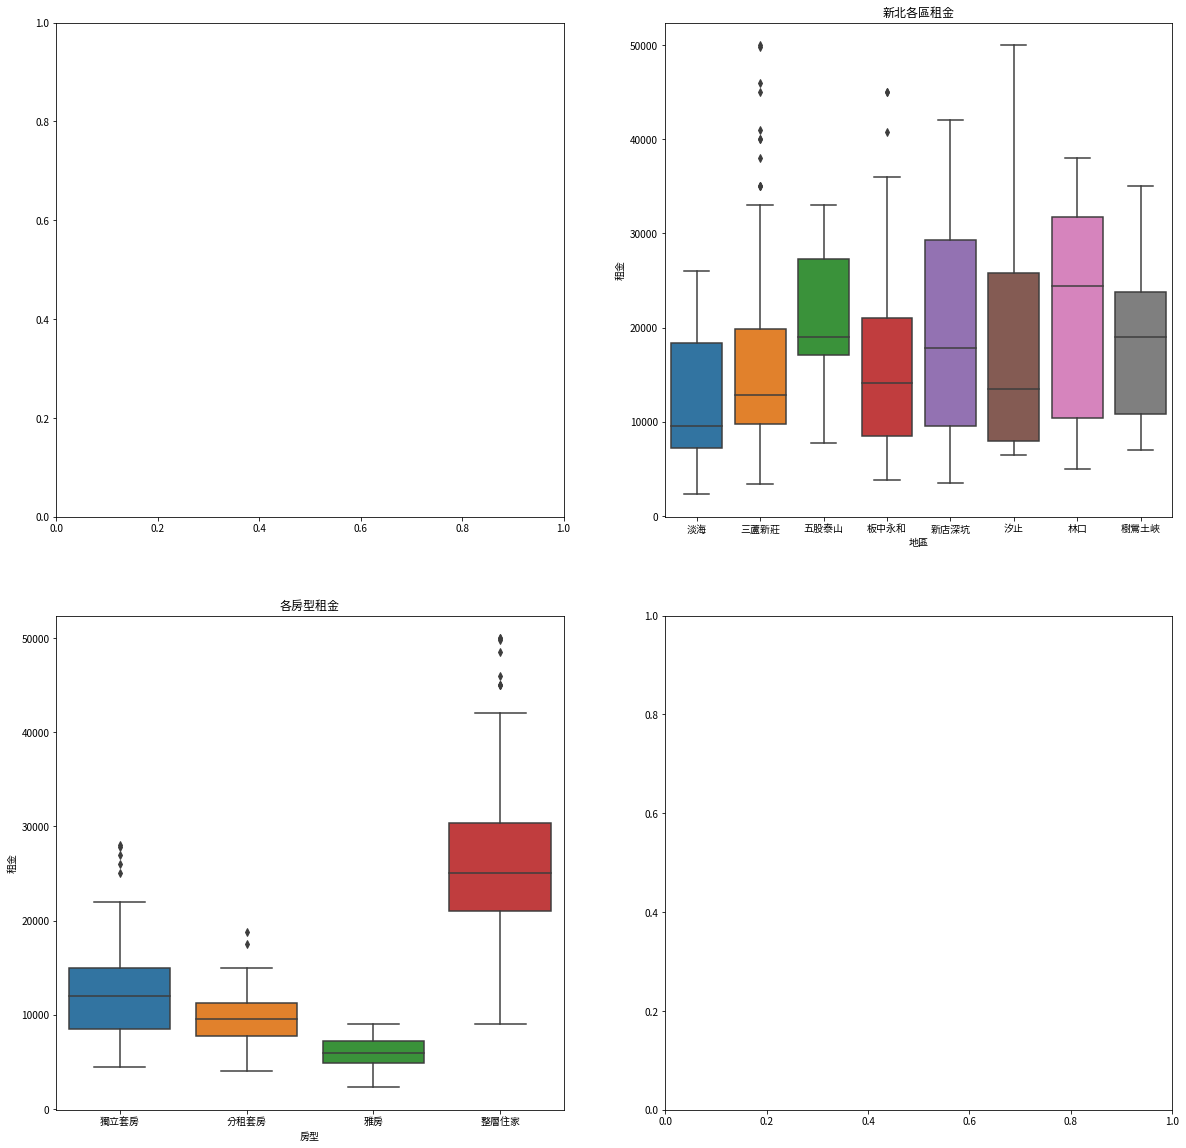

In [31]:
#5.畫圖前須加入指令使用中文字體
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(20,20)
sns.boxplot(data=data, x='分區', y='租金', orient='v', ax=axes[0][1])
sns.boxplot(data=data, x='房型', y='租金', orient='v', ax=axes[1][0])
axes[0][1].set(xlabel='地區', ylabel='租金', title='新北各區租金')
axes[1][0].set(xlabel='房型', ylabel='租金', title='各房型租金')

[Text(0, 0.5, 'Average price'),
 Text(0.5, 0, 'Room'),
 Text(0.5, 1.0, 'Average price by room')]

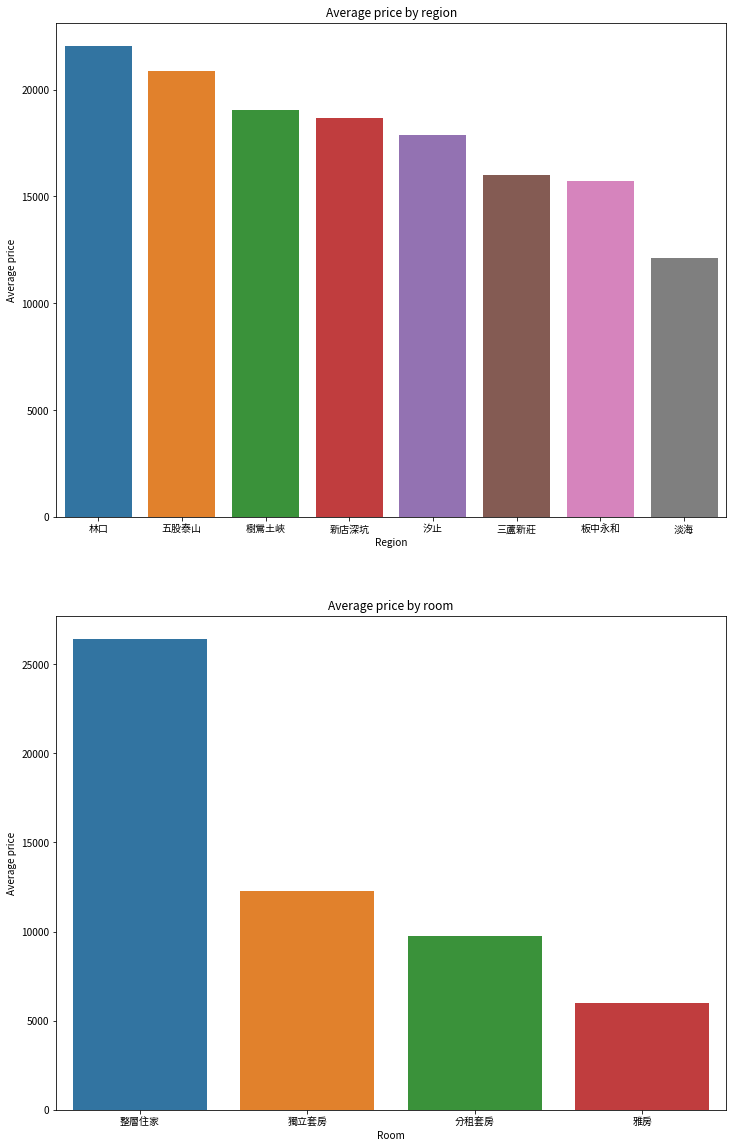

In [32]:
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']

fig, (ax1, ax2) = plt.subplots(nrows=2)
fig.set_size_inches(12,20)

regionAgg = pd.DataFrame(data.groupby('分區')['租金'].mean()).reset_index()
regionSort = regionAgg.sort_values(by='租金', ascending=False)
sns.barplot(data=regionSort, x='分區', y='租金', ax=ax1) #order=regionOrder
ax1.set(xlabel='Region', ylabel='Average price', title='Average price by region')

roomAgg = pd.DataFrame(data.groupby('房型')['租金'].mean()).reset_index()
roomSort = roomAgg.sort_values(by='租金', ascending=False)
sns.barplot(data=roomSort, x='房型', y='租金', ax=ax2) #order=regionOrder
ax2.set(xlabel='Room', ylabel='Average price', title='Average price by room')


In [37]:
#特徵轉化為數字:'房型', '樓層', '分區'
data['房型'] = data['房型'].astype('category').cat.codes
data['樓層'] = data['樓層'].astype('category').cat.codes
data['分區'] = data['分區'].astype('category').cat.codes

# Correlation

Text(0.5, 1, 'Tri-corr heatmap')

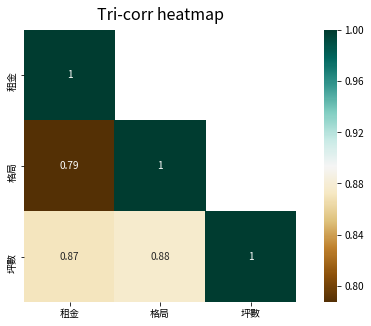

In [40]:
corrMatt = data[['租金', '格局', '坪數']].corr()
mask = np.triu(np.ones_like(corrMatt, dtype=np.bool), 1) #上三角形起始點往右平移一格 保留corr=1

fig, ax = plt.subplots()
fig.set_size_inches(10,5)
corrHeat = sns.heatmap(corrMatt, mask=mask, vmax=1, annot=True, square=True, cmap='BrBG')
corrHeat.set_title('Tri-corr heatmap', fontdict={'fontsize':16}, pad=10)

Text(0.5, 1, 'Features corr with price')

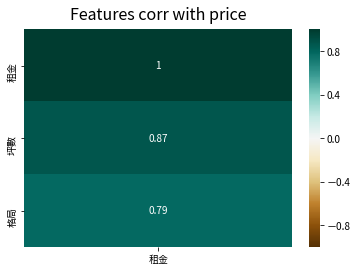

In [34]:
sortHeat = sns.heatmap(corrMatt[['租金']].sort_values(by='租金', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
sortHeat.set_title('Features corr with price', fontdict={'fontsize':16}, pad=10)

# Split train & test

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [43]:
x_train, x_test, y_train, y_test = train_test_split(
    data[['房型','格局','坪數','樓層','分區']], data[['租金']], random_state=42, train_size=0.8)

In [45]:
model = RandomForestRegressor(n_estimators=100, random_state=42, oob_score=True)
model.fit(x_train, y_train)
pred = model.predict(x_test)

C:\Users\asuss\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\asuss\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


In [46]:
y_test

,租金
570,19000
83,12000
545,9500
350,45000
133,11000
...,...
141,15000
150,23800
517,7800
156,23000


In [53]:
y_test = np.array(y_test)
y_test

array([[19000],
       [12000],
       [ 9500],
       [45000],
       [11000],
       [15888],
       [ 8000],
       [ 3800],
       [15000],
       [29000],
       [38000],
       [21000],
       [ 8000],
       [33000],
       [19000],
       [15500],
       [13000],
       [19800],
       [33500],
       [17500],
       [21000],
       [ 9000],
       [33500],
       [15000],
       [10000],
       [19000],
       [28000],
       [35000],
       [ 8000],
       [ 8800],
       [16000],
       [11500],
       [ 9500],
       [28400],
       [13950],
       [31000],
       [28000],
       [12000],
       [ 4500],
       [ 7800],
       [28000],
       [12000],
       [11000],
       [18888],
       [15000],
       [12000],
       [ 8500],
       [50000],
       [14800],
       [ 9000],
       [ 6300],
       [ 7500],
       [35000],
       [ 8000],
       [18500],
       [ 9800],
       [ 8500],
       [ 6000],
       [10000],
       [13200],
       [11000],
       [24800],
       [

In [47]:
pred

array([22244.98      , 17594.        ,  9937.        , 39980.        ,
       13790.94      , 10177.27633478,  6555.        ,  4347.33333333,
       14626.71980952, 25458.        , 24898.        , 21639.        ,
        8071.18831169, 28300.        , 19232.        , 15616.3968254 ,
       10569.76666667, 18166.        , 23096.        , 18452.66666667,
       28416.66      ,  7117.21666667, 23096.        , 11744.        ,
       10581.11029024, 13672.        , 31798.        , 23302.8       ,
        7258.16666667, 10177.27633478, 20738.99      , 11943.66666667,
        8141.45595238, 22414.386     , 11017.82066667, 24828.62      ,
       33810.96      , 11610.        ,  6009.        ,  9143.41666667,
       25637.8       , 13028.20729548, 13649.48742857, 16073.49622222,
       16073.49622222, 13028.20729548, 10410.72222222, 25078.6       ,
       25604.        ,  7111.06666667,  6095.83333333, 10410.72222222,
       35084.        , 13028.20729548, 17677.        ,  9718.80839683,
      

In [50]:
pred = np.round(pred)
pred

array([22245., 17594.,  9937., 39980., 13791., 10177.,  6555.,  4347.,
       14627., 25458., 24898., 21639.,  8071., 28300., 19232., 15616.,
       10570., 18166., 23096., 18453., 28417.,  7117., 23096., 11744.,
       10581., 13672., 31798., 23303.,  7258., 10177., 20739., 11944.,
        8141., 22414., 11018., 24829., 33811., 11610.,  6009.,  9143.,
       25638., 13028., 13649., 16073., 16073., 13028., 10411., 25079.,
       25604.,  7111.,  6096., 10411., 35084., 13028., 17677.,  9719.,
        7111.,  9121.,  9240.,  6468.,  8469., 25199., 13423., 15924.,
       15616., 27764., 22200., 18166., 16408., 29064.,  9880., 24545.,
       14733., 11668., 37048., 23149., 11044., 18272., 23767., 18726.,
        8979.,  8688.,  5406.,  8946., 34068., 11168., 12020., 20304.,
        9664., 21189., 27100., 12638.,  9121., 23000., 10581., 11018.,
       15066.,  7916.,  7476., 21862., 22300., 10177., 18775., 35720.,
       10493.,  7071., 19429., 28162.,  8645., 27926., 11321.])

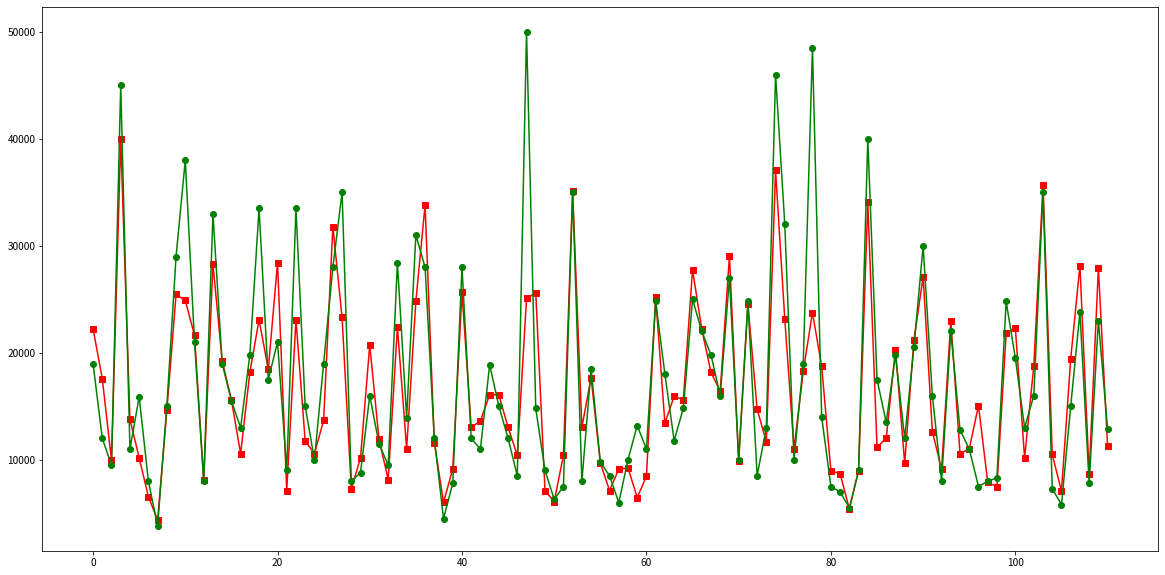

In [58]:
plt.figure(figsize=(20,10))
plt.plot(pred, 's-', color = 'r', label='presiction')
plt.plot(y_test, 'o-', color = 'g', label='target')

In [55]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) **2).mean())

rmse_val = rmse(pred, y_test)
print("rmse error is:" + str(rmse_val))

rmse error is:13114.949072530437
